### [Гауссовские процессы на языке Python](https://www.youtube.com/watch?v=DU_Lhl_j2v0)
https://github.com/yeahrmek/gp

Рассмотрим задачу регресии: 
- по обучающей выборке построить аппроксимацию функции, 
- доверительный интервал.

#### Гауссовские процессы:
- вероятностная модель
- моделирует распределение функций:
    - распределение в каждой точке $f(x) \sim Norm(m(x),\; k(x, x^{'}))$
    - распределение всей функции: $f(x) \approx f(x_i))_{i=1}^n 
        \sim Norm(\boldsymbol m, \boldsymbol K),$ где 
        $\boldsymbol m = (m_i)_{i=1}^n, 
        \; \boldsymbol K = k(x_i, x_j), \; i,j = \overline{1, n}$
- аппроксимация $f(x)$ имеет вид:
    - $f(x) = \sum \alpha_i K(x, x_i)$ - математическое ожидание значения функции в точке $x$ при условии того, что заданы значения в точках орбучающей выборки.
    
Предполагаем коррелированность функций в соседних точках. Чем дальше находятся точки друг от друга, тем больше они могут различаться. Поведение этих функций задается с помощью ковариационной функции (RBF - Radial Basis Function: $k(x,y)=\sigma^2*exp(-\theta^2\|x-y\|^2).$ 


***Ограничения***
- сложность построения модели $O(N^3) \Rightarrow$ неприменимы к большим выборкам
- наиболее распространенное RBF ядро применимо только к гладким функциям
- для специфических задач необходимо подбирать свою ковариационную функцию
- вырождение (переобучение) - особенно, если точки лежат неравномерно

In [38]:
import GPy
import matplotlib.pyplot as plt
import numpy as np

In [39]:
N = 50
noise_var = 0.05

np.random.seed = 32

x_train = np.linspace(0, 10, N)[:,None]
k = GPy.kern.RBF(1)   # dim
y_train = np.random.multivariate_normal(
    np.zeros(N), k.K(x_train) + np.eye(N) * np.sqrt(noise_var)
    ).reshape(-1,1)

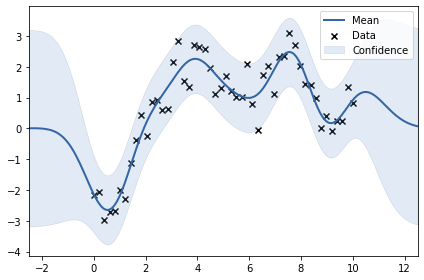

In [40]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=0.1)
model = GPy.models.GPRegression(x_train, y_train, kernel)
model.optimize()
model.plot()
plt.show()